<a href="https://colab.research.google.com/github/mrrkdas/Mini-Projects/blob/main/Final_Fast_Neural_Style_Transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image

In [ ]:
def tensor_to_image(tensor):
  tensor = tensor * 255
  tensor = np.array(tensor)
  if np.ndim(tensor) > 3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]

  return PIL.Image(tensor)

In [10]:
def load_img(path_to_img):
  max_dims = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels = 3, dtype = tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32) 
  long_dim = max(shape)
  scale = max_dims / long_dim

  new_shape = tf.cast(shape * scale, tf.int32) 

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis,:]

  return img

In [ ]:
def imshow(image, title = None):
  image = tf.squeeze(image, axis = 0)

  plt.imshow(image)

  if title:
    plt.title(title)

In [7]:
style_path =  tf.keras.utils.get_file('style.jpeg', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQOucYXAxDtPGqvI9Gm5YcgfBCqzRKrSvLrDV9qsDBrgjL1QzyQIxeGcU2Xbp8VL5_H3gA&usqp=CAU')
content_path = tf.keras.utils.get_file('content.jpeg', 'https://imgresizer.eurosport.com/unsafe/1200x0/filters:format(jpeg)/origin-imgresizer.eurosport.com/2018/01/16/2247100-46840795-2560-1440.jpg')

131072/121702 [================================] - 0s 0us/step


In [11]:
style_img = load_img(style_path)
content_img = load_img(content_path)

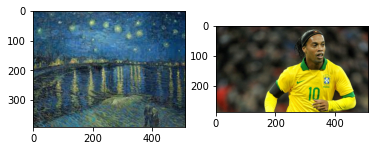

In [12]:
plt.subplot(1,2, 1)
imshow(style_img)

plt.subplot(1,2, 2)
imshow(content_img)

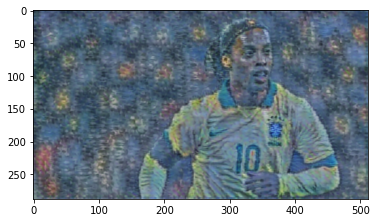

In [13]:
import tensorflow_hub as hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_img = hub_model(tf.constant(content_img), tf.constant(style_img))[0]
imshow(stylized_img)